In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(11111111)

In [2]:
mean_return = 0.01 * np.random.randn(2)
mean_return

array([-0.00798242,  0.00181554])

In [3]:
rho = 0.01 * np.random.randn()
rho

0.007129547452251222

In [4]:
sigmas = np.exp(np.random.randn(2))
sigmas

array([2.83423006, 0.50425457])

In [5]:
cov = np.diag(sigmas**2)
cov

array([[8.03286002, 0.        ],
       [0.        , 0.25427267]])

In [6]:
sigma12 = sigmas[0] * sigmas[1] * rho
cov[0,1] = sigma12
cov[1,0] = sigma12
cov

array([[8.03286002, 0.01018936],
       [0.01018936, 0.25427267]])

In [7]:
def softmax(w):
  a = np.exp(w)
  return a / a.sum()

In [8]:
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
  w = softmax(np.random.randn(2))
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov).dot(w))
  returns[i] = ret
  risks[i] = risk

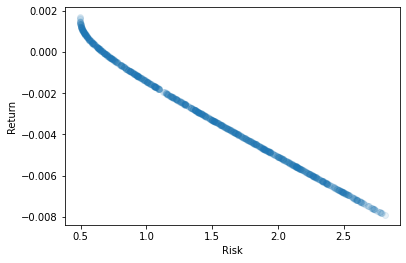

In [9]:
plt.scatter(risks, returns, alpha=0.1);
plt.xlabel("Risk");
plt.ylabel("Return");

In [10]:
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
  x = np.random.random()
  w = np.array([x, 1-x]) # positive only
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov).dot(w))
  returns[i] = ret
  risks[i] = risk

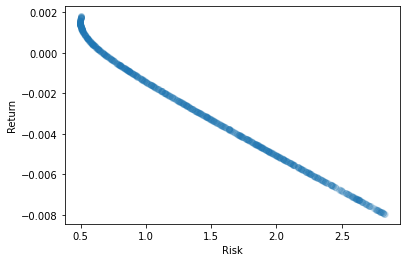

In [11]:
plt.scatter(risks, returns, alpha=0.1);
plt.xlabel("Risk");
plt.ylabel("Return");

In [12]:
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
  x = np.random.random() - 0.5
  w = np.array([x, 1-x]) # short-selling allowed
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov).dot(w))
  returns[i] = ret
  risks[i] = risk

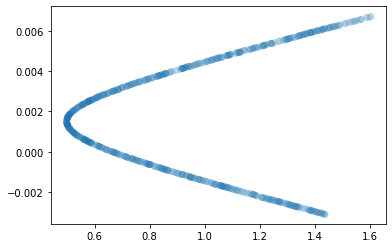

In [13]:
plt.scatter(risks, returns, alpha=0.1)

# 3-Asset Portfolio

In [14]:
mean_return = 0.01 * np.random.randn(3)
mean_return

array([-0.00064955, -0.00479921,  0.00296115])

In [15]:
sigmas = np.exp(np.random.rand(3))
sigmas

array([1.09940982, 1.69514522, 1.18164315])

In [16]:
rhos = 0.01 * np.random.randn(3)
rhos

array([-0.00027072,  0.01516527, -0.01046581])

In [17]:
cov = np.array([
     [sigmas[0]**2, rhos[0]*sigmas[0]*sigmas[1], rhos[1]*sigmas[0]*sigmas[1]],
     [rhos[0]*sigmas[0]*sigmas[1], sigmas[1]**2, rhos[2]*sigmas[1]*sigmas[2]],
     [rhos[1]*sigmas[0]*sigmas[2], rhos[2]*sigmas[1]*sigmas[2], sigmas[2]**2],
])
cov

array([[ 1.20870195e+00, -5.04527626e-04,  2.82628879e-02],
       [-5.04527626e-04,  2.87351731e+00, -2.09636063e-02],
       [ 1.97013492e-02, -2.09636063e-02,  1.39628054e+00]])

In [18]:
N = 1000
returns = np.zeros(N)
risks = np.zeros(N)
for i in range(N):
  x1, x2 = np.random.random(2) - 0.5
  w = np.array([x1, x2, 1 - x1 - x2]) # short-selling allowed
  np.random.shuffle(w)
  ret = mean_return.dot(w)
  risk = np.sqrt(w.dot(cov).dot(w))
  returns[i] = ret
  risks[i] = risk

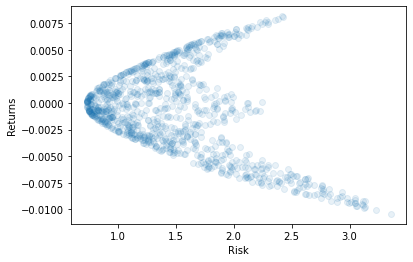

In [19]:
plt.scatter(risks, returns, alpha=0.1);
plt.xlabel("Risk");
plt.ylabel("Returns");

# Max and Min Return

In [20]:
from scipy.optimize import linprog

In [21]:
D = len(mean_return)

In [22]:
A_eq = np.ones((1, D))
b_eq = np.ones(1)

In [23]:
### NOTE: The bounds are by default (0, None) unless otherwise specified.
# bounds = None
bounds = [(-0.5, None)]*D
bounds

[(-0.5, None), (-0.5, None), (-0.5, None)]